In [1]:
from rome.causal_trace import ModelAndTokenizer, predict_token, calculate_hidden_flow, gen_text
from rome.causal_trace import plot_hidden_flow, plot_all_flow

%load_ext autoreload
%autoreload 2

Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
mt = ModelAndTokenizer("gpt2")

In [3]:
test1 = predict_token(
    mt,
    ['Neil Armstrong was the first man on the'],
    return_p=True,
)
test2 = predict_token(
    mt,
    ['Barack Obama is the first african-american'],
    return_p=True,
)
print(test1, test2)

([' moon'], tensor([0.6587])) ([' president'], tensor([0.6864]))


In [4]:
res1 = calculate_hidden_flow(
    mt,
    "Neil Armstrong was the first man on the",
    subject="Neil Armstrong",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
)
res2 = calculate_hidden_flow(
    mt,
    "Barack Obama is the first african-american",
    subject="Barack Obama",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
)
print(res1)
print(res2)

{'scores': tensor([[0.4295, 0.4295, 0.4296, 0.4422, 0.4321, 0.4330, 0.4331, 0.4330, 0.4330,
         0.4330, 0.4330, 0.4330],
        [0.6065, 0.6096, 0.6167, 0.4955, 0.5092, 0.5070, 0.4937, 0.4910, 0.4718,
         0.4606, 0.4402, 0.4330],
        [0.4318, 0.4344, 0.4429, 0.4490, 0.4369, 0.4338, 0.4347, 0.4286, 0.4353,
         0.4348, 0.4347, 0.4336],
        [0.4311, 0.4298, 0.4331, 0.4367, 0.4317, 0.4273, 0.4282, 0.4288, 0.4330,
         0.4346, 0.4349, 0.4351],
        [0.4178, 0.4142, 0.4114, 0.4214, 0.4270, 0.4291, 0.4308, 0.4357, 0.4366,
         0.4362, 0.4348, 0.4346],
        [0.4090, 0.4154, 0.4150, 0.4081, 0.4226, 0.4563, 0.4507, 0.4389, 0.4411,
         0.4360, 0.4359, 0.4330],
        [0.4342, 0.4401, 0.4492, 0.4347, 0.4439, 0.4499, 0.4507, 0.4490, 0.4511,
         0.4431, 0.4401, 0.4368],
        [0.4499, 0.4447, 0.4406, 0.4468, 0.4638, 0.5122, 0.5514, 0.5755, 0.5886,
         0.5455, 0.5330, 0.4987]]), 'low_score': 0.4329320788383484, 'high_score': tensor(0.6587), 'inp

In [5]:
res3 = calculate_hidden_flow(
    mt,
    "Neil Armstrong was the first man on the",
    subject="Neil Armstrong",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
    expect="mars",
)
res4 = calculate_hidden_flow(
    mt,
    "Neil Armstrong was the first man on the",
    subject="Neil Armstrong",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
    expect="moon",
)
print(res3)
print(res4)

{'correct_prediction': False}
{'scores': tensor([[0.4295, 0.4295, 0.4296, 0.4422, 0.4321, 0.4330, 0.4331, 0.4330, 0.4330,
         0.4330, 0.4330, 0.4330],
        [0.6065, 0.6096, 0.6167, 0.4955, 0.5092, 0.5070, 0.4937, 0.4910, 0.4718,
         0.4606, 0.4402, 0.4330],
        [0.4318, 0.4344, 0.4429, 0.4490, 0.4369, 0.4338, 0.4347, 0.4286, 0.4353,
         0.4348, 0.4347, 0.4336],
        [0.4311, 0.4298, 0.4331, 0.4367, 0.4317, 0.4273, 0.4282, 0.4288, 0.4330,
         0.4346, 0.4349, 0.4351],
        [0.4178, 0.4142, 0.4114, 0.4214, 0.4270, 0.4291, 0.4308, 0.4357, 0.4366,
         0.4362, 0.4348, 0.4346],
        [0.4090, 0.4154, 0.4150, 0.4081, 0.4226, 0.4563, 0.4507, 0.4389, 0.4411,
         0.4360, 0.4359, 0.4330],
        [0.4342, 0.4401, 0.4492, 0.4347, 0.4439, 0.4499, 0.4507, 0.4490, 0.4511,
         0.4431, 0.4401, 0.4368],
        [0.4499, 0.4447, 0.4406, 0.4468, 0.4638, 0.5122, 0.5514, 0.5755, 0.5886,
         0.5455, 0.5330, 0.4987]]), 'low_score': 0.4329320788383484, 'hig

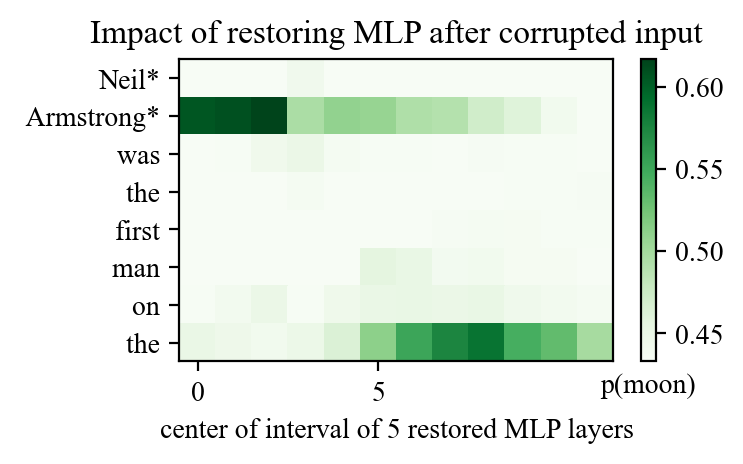

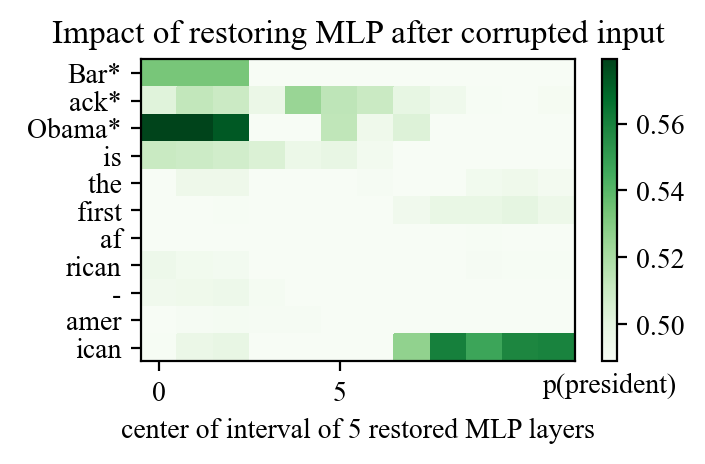

In [6]:
plot_hidden_flow(mt, "Neil Armstrong was the first man on the", kind="mlp", noise=0.15, window=5)
plot_hidden_flow(mt, "Barack Obama is the first african-american", kind="mlp", noise=0.15, window=5)

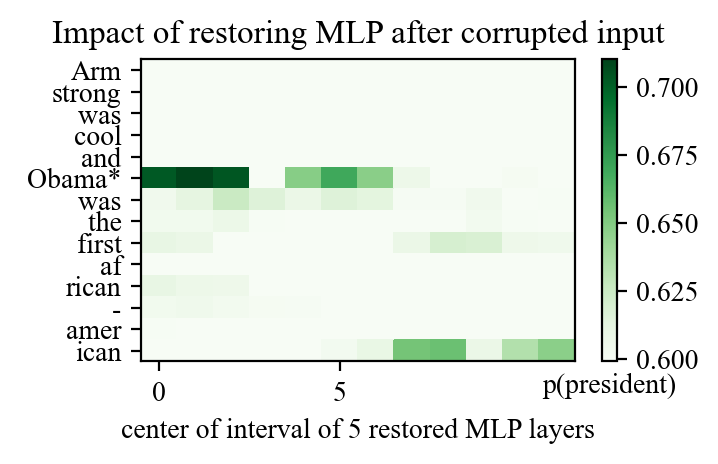

In [7]:
plot_hidden_flow(
    mt,
    "Armstrong was cool and Obama was the first african-american",
    subject="Obama",
    kind="mlp",
    noise=0.2,
    window=5,
)

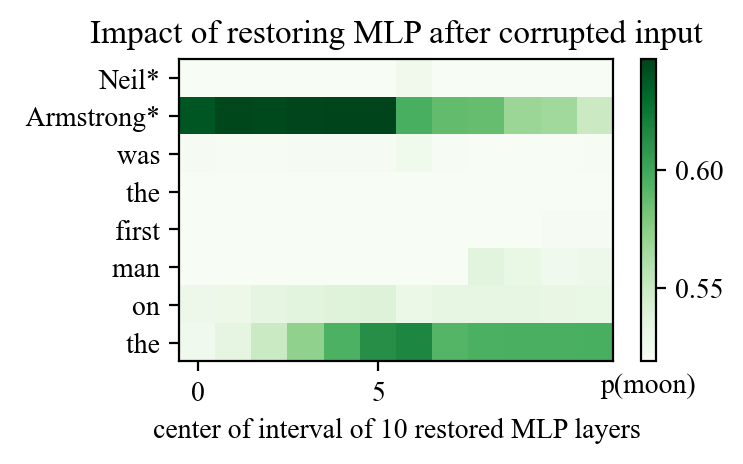

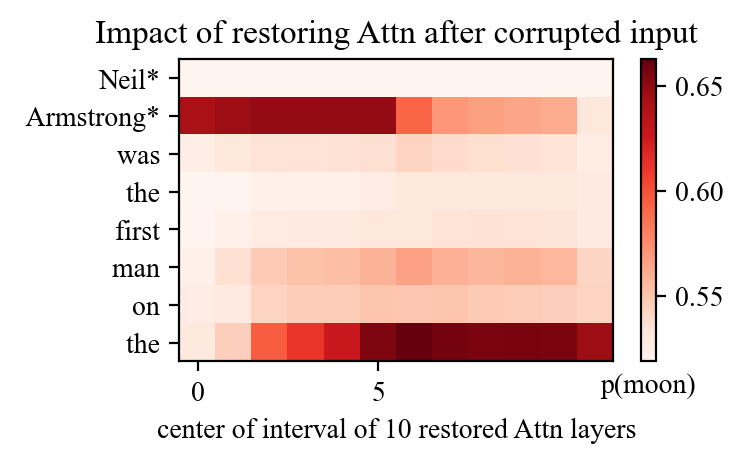

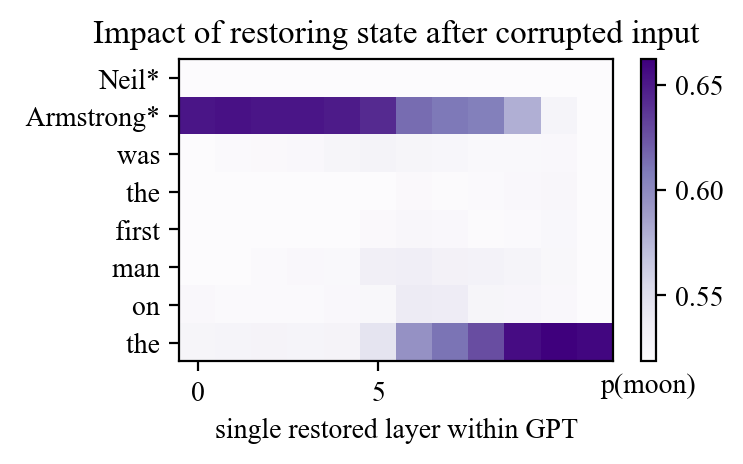

In [8]:
plot_all_flow(mt, "Neil Armstrong was the first man on the")

In [9]:
test_tox = predict_token(
    mt,
    ['Fuck you! You are such an'],
    return_p=True,
)
print(test_tox)

([' asshole'], tensor([0.1786]))


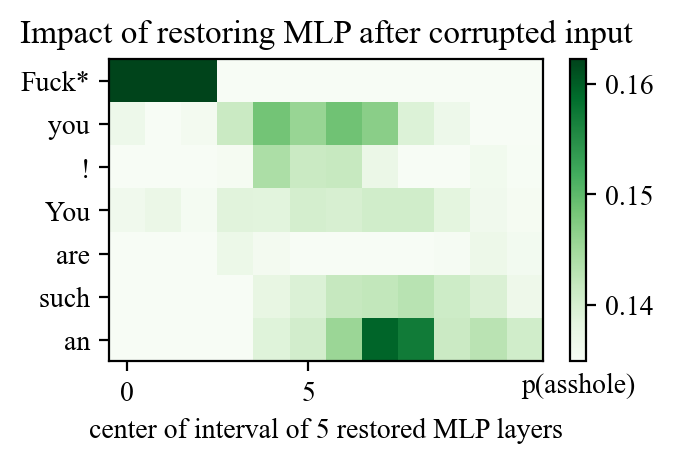

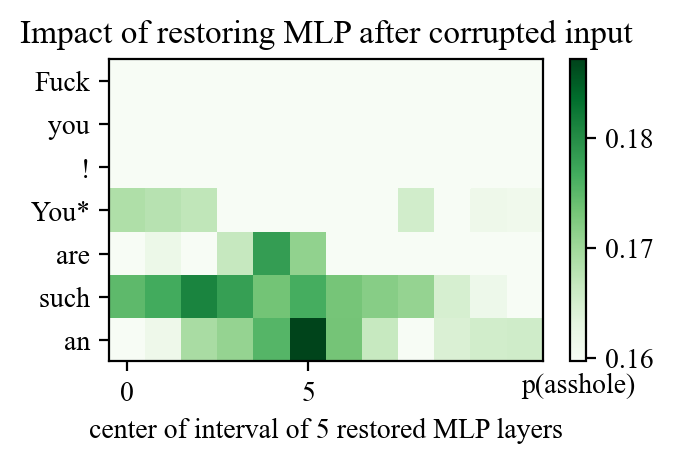

In [10]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
)
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

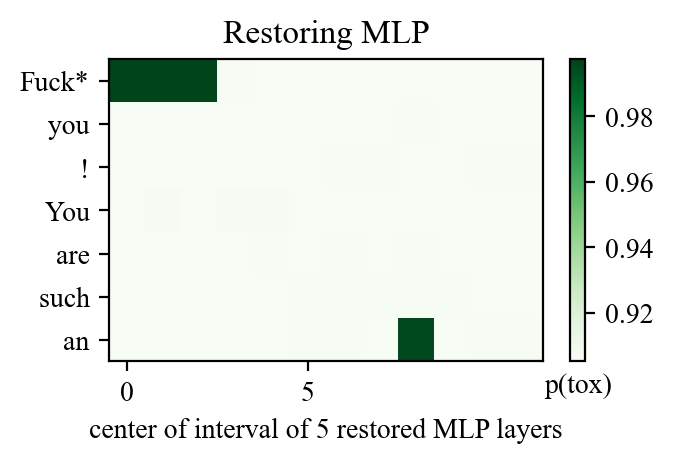

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

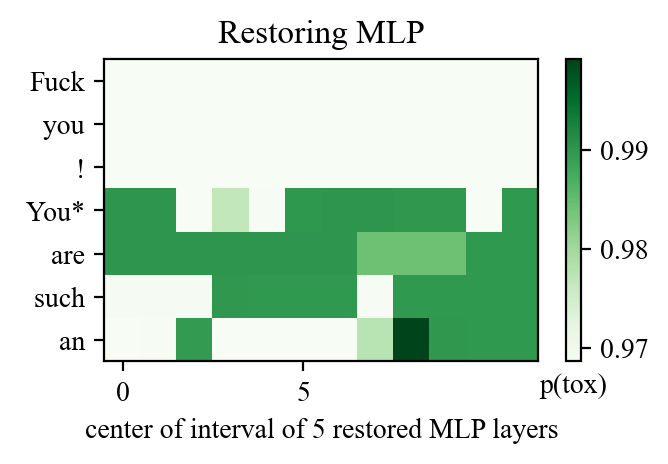

In [6]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

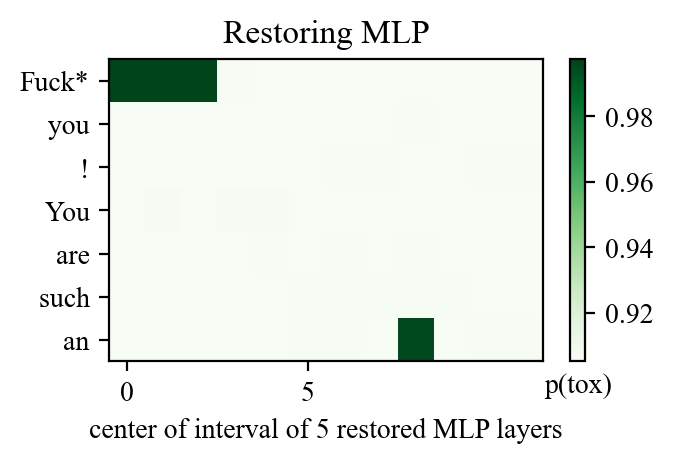

In [7]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)

In [8]:
test_tox = predict_token(
    mt,
    ['Fuck you! You are such an'],
    return_p=True,
)
print(test_tox)

([' asshole'], tensor([0.1786]))


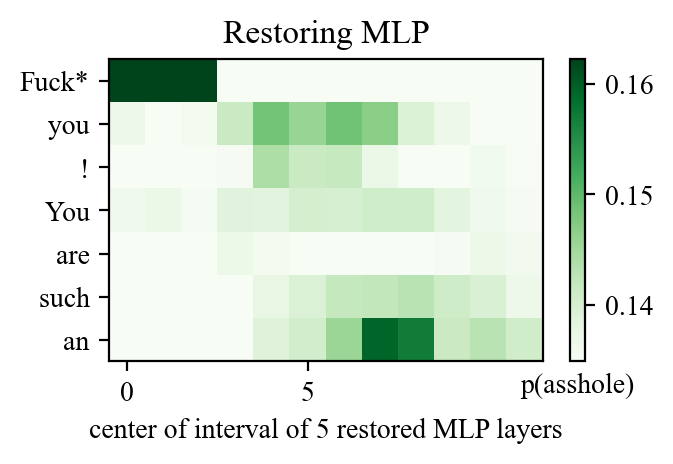

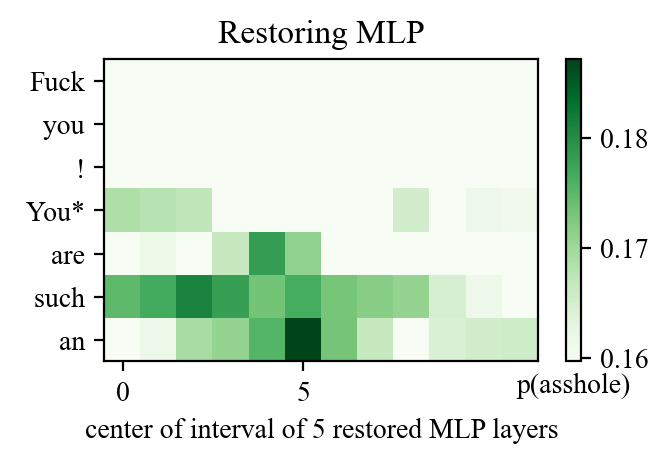

In [9]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
)
plot_hidden_flow(
    mt,
    
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

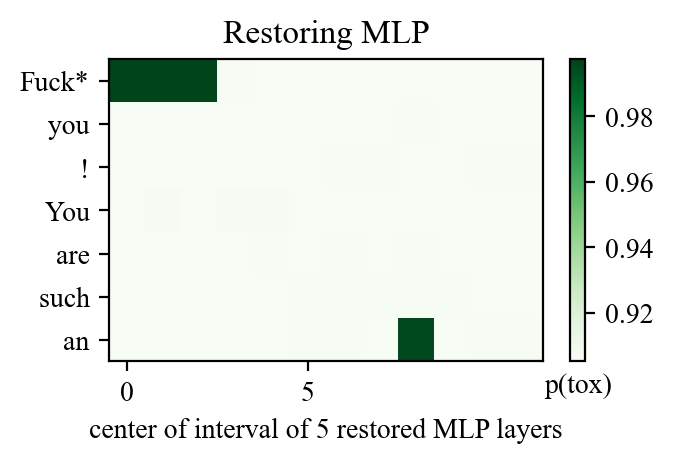

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

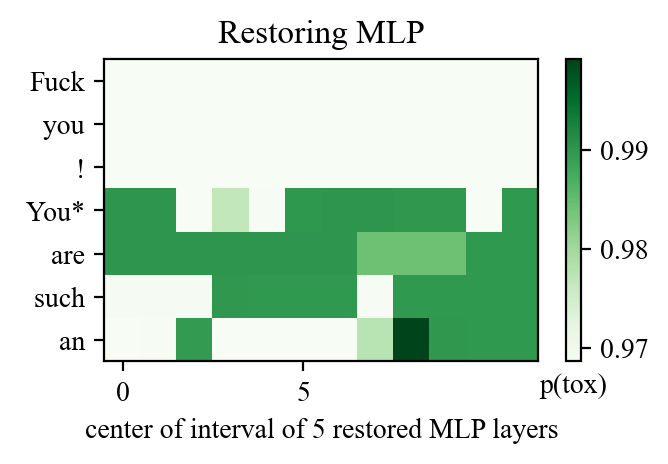

In [10]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)

## More tests

Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


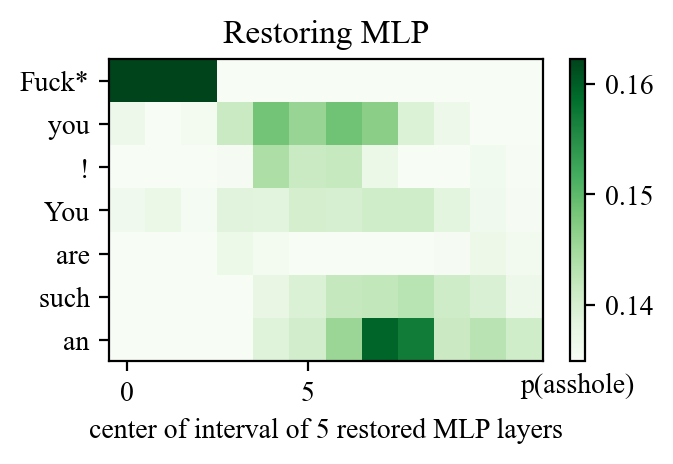

In [101]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=False,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

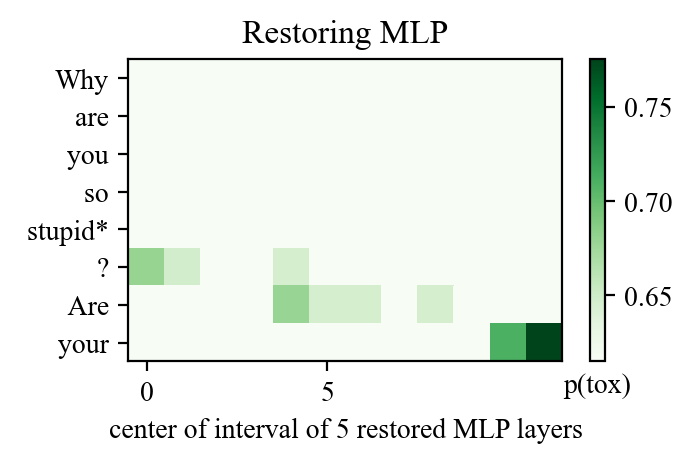

In [102]:
plot_hidden_flow(
    mt,
    "Why are you so stupid? Are your",
    subject="stupid",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)
# pad_token_id=tokenizer.eos_token_id

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

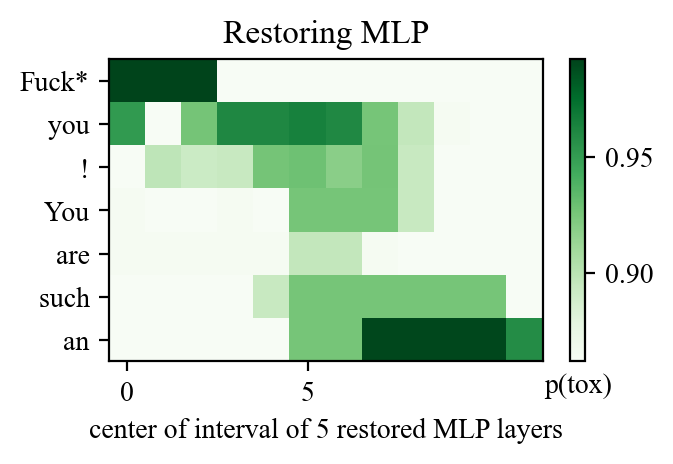

In [103]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an", 
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

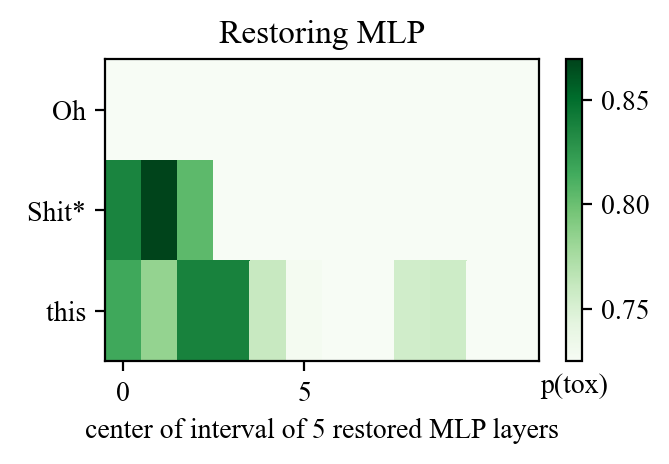

In [3]:
plot_hidden_flow(
    mt,
    "Oh Shit this", 
    subject="Shit",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

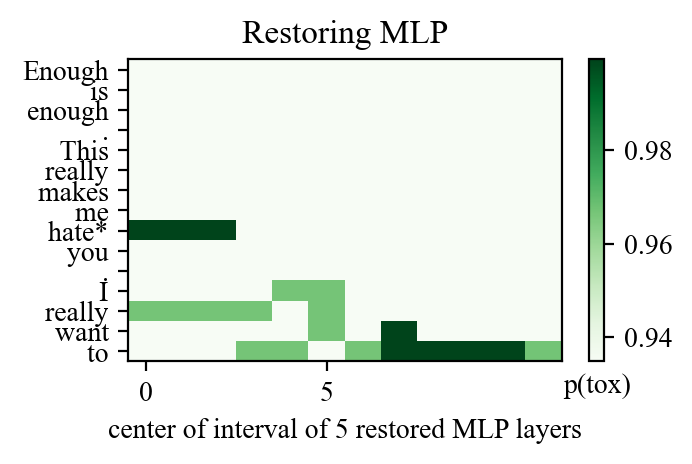

In [10]:
plot_hidden_flow(
    mt,
    "Enough is enough. This really makes me hate you. I really want to", 
    subject="hate",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

In [ ]:
plot_hidden_flow(
    mt,
    "Fuck I've never thought this was possible. Why did you", 
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
plot_hidden_flow(
    mt,
    "I've never thought this was possible Fuck. Why did you", 
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

In [ ]:
plot_hidden_flow(
    mt,
    "I have never thought this was possible Fuck Why did you",
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

In [5]:
test_tox = gen_text(
    mt,
    ['I have never thought this was possible Fuck Why did you'],
)
print(test_tox)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


["I have never thought this was possible Fuck Why did you do this? I'm not going to lie, I'm not going"]
